In [591]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [649]:
def load_data(path):
    
    data = pd.read_csv(path, delim_whitespace = True, header = None )
    
    columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
         'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
         'other_debtors', 'residing_since', 'property', 'age',
         'inst_plans', 'housing', 'num_credits',
         'job', 'dependents', 'telephone', 'foreign_worker', 'status']
                  
    
    data.columns = columns

    return data

In [650]:
path = './german.txt'

In [651]:
df = load_data(path)
df.loc[df.status == 2, 'status'] = 0

In [652]:
df.tail()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,0
999,A12,45,A34,A41,4576,A62,A71,3,A93,A101,...,A123,27,A143,A152,1,A173,1,A191,A201,1


In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
purpose              1000 non-null object
amount               1000 non-null int64
saving_acc           1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
other_debtors        1000 non-null object
residing_since       1000 non-null int64
property             1000 non-null object
age                  1000 non-null int64
inst_plans           1000 non-null object
housing              1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
dependents           1000 non-null int64
telephone            1000 non-null object
foreign_worker       1000 non-null object
status               1000 non-null int64
dtypes: int64(8), ob

In [654]:
def split(X, y):
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    
    return X_train, X_val, y_train, y_val

In [655]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [656]:
X_train, X_val, y_train, y_val = split(X, y)

In [657]:
X_train.shape

(700, 20)

In [658]:
num_cols = X_train._get_numeric_data().columns.values
cat_cols = list(set(X_train.columns) - set(num_cols))

# EDA - Univariate

## 1) Q - Q plot

In [519]:
def qq_calculate(X_train, X_test):
     
    train = []
    test = []
    for quantile in np.arange(0.1,1.1,0.1):
        train.append(X_train.quantile(quantile))
        test.append(X_test.quantile(quantile))   
    train_quantile = pd.concat(train, axis=1)
    test_quantile = pd.concat(test, axis=1)
    train_quantile.columns = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
    test_quantile.columns = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
    return train_quantile, test_quantile

In [520]:
def qq_plot(train_quantile, test_quantile):
    
    features = train_quantile.index.values
    plt.figure(figsize=(13,15))
    for i in range(0, len(features)):
        plt.subplot(5,2,i+1)
        plt.plot(train_quantile.loc[features[i]], test_quantile.loc[features[i]])
        plt.plot(train_quantile.loc[features[i]], train_quantile.loc[features[i]])
        plt.xlabel('Train_' + features[i])
        plt.ylabel('Test_' + features[i])
        plt.tight_layout()

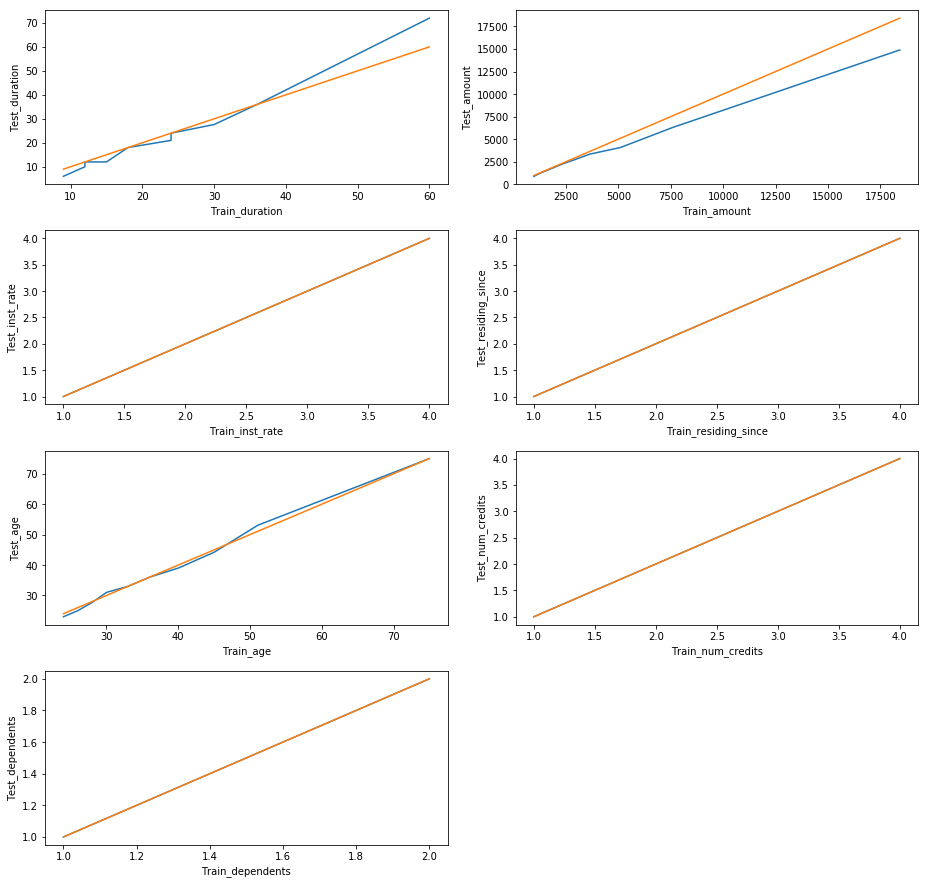

In [521]:
train_quantile, test_quantile = qq_calculate(X_train, X_val)
qq_plot(train_quantile, test_quantile)

## 2) Box- whisker plot

In [581]:
def box_plot(X, num_cols):
    plt.figure(figsize=(13,15))
    for i in range(0, len(num_cols)):

            plt.subplot(4,2,i+1)
            sns.boxplot(y=num_cols[i],data = X)

    plt.tight_layout()
    plt.show()

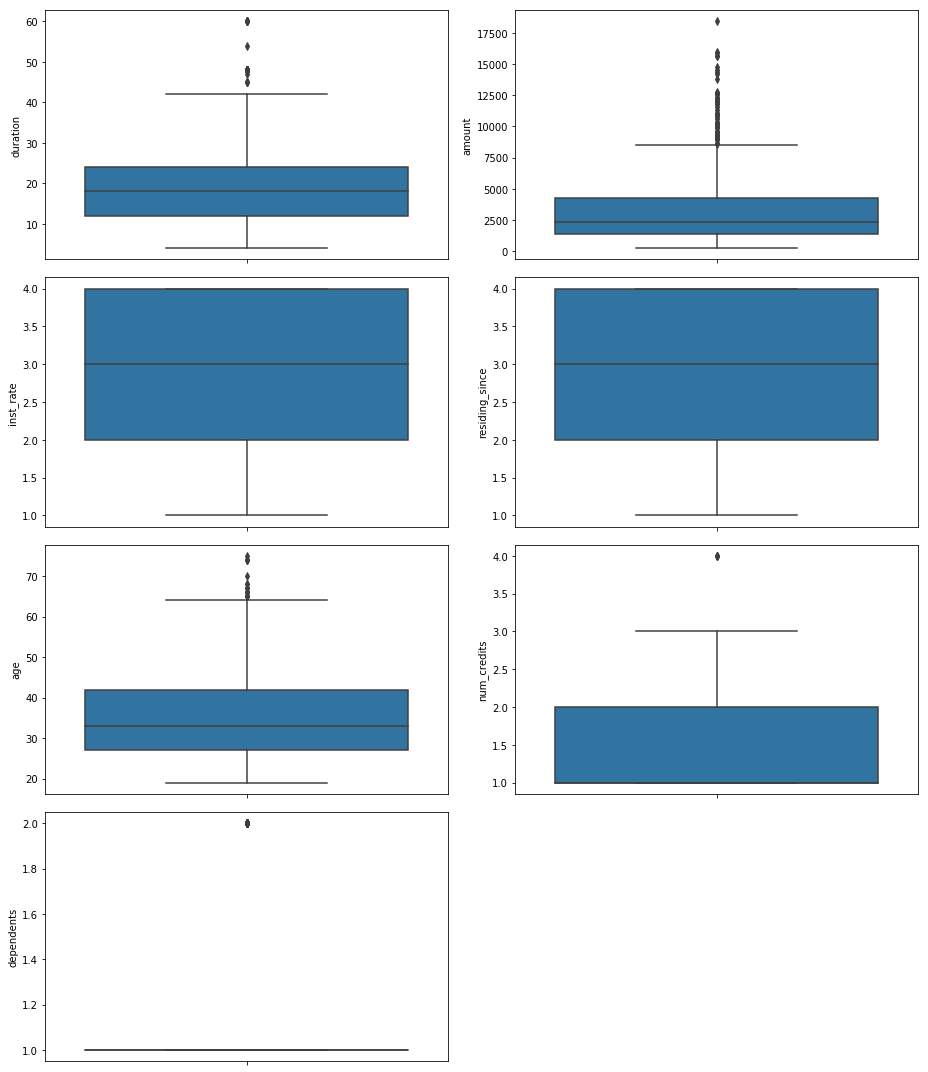

In [582]:
box_plot(X_train, num_cols)

## 3) 5 - point summary + Standard deviation

In [523]:
X_train.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,21.252857,3406.815714,2.981429,2.834286,35.492857,1.420000,1.137143
std,11.900051,2971.897408,1.118679,1.103238,11.253037,0.581695,0.344244
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1381.750000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2332.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4226.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


## 4) Distributions

In [586]:
def distribution_plot_numerical(X, num_cols):

    plt.figure(figsize=(20,15))
    for i in range(0, len(num_cols)):

        plt.subplot(4,2,i+1)
        sns.distplot(X[num_cols[i]], kde=True)

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwar

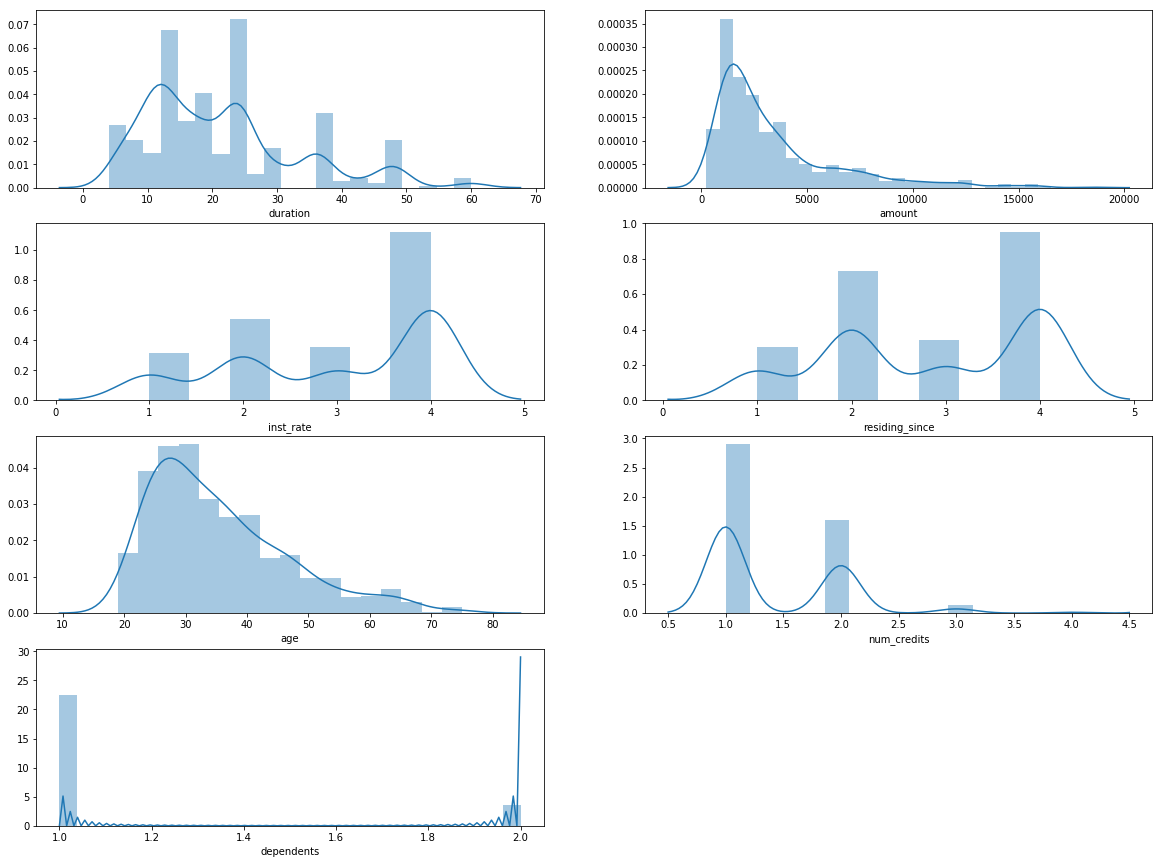

In [587]:
distribution_plot_numerical(X_train, num_cols)

In [589]:
def distribution_plot_categorical(X, cat_cols):
    plt.figure(figsize=(20,15))
    for i in range(0, len(cat_cols)):

        plt.subplot(7,2,i+1)
        sns.countplot(df[cat_cols[i]])
        plt.tight_layout()

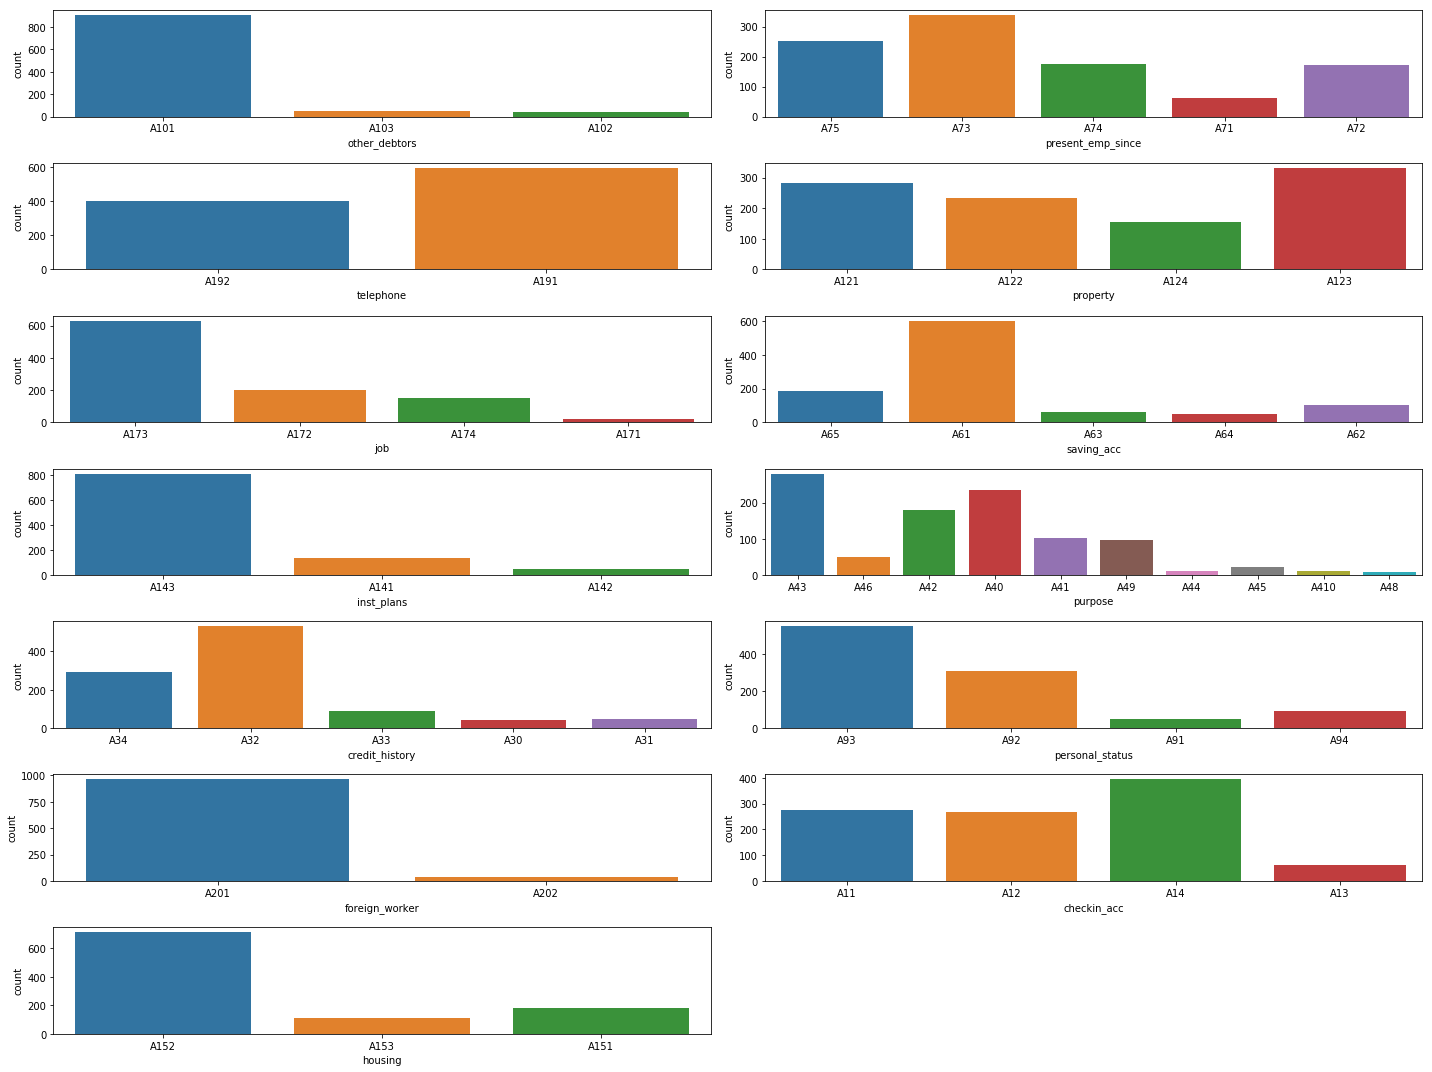

In [590]:
distribution_plot_categorical(X_train, cat_cols)

# EDA - Bivariate

## Facet plots

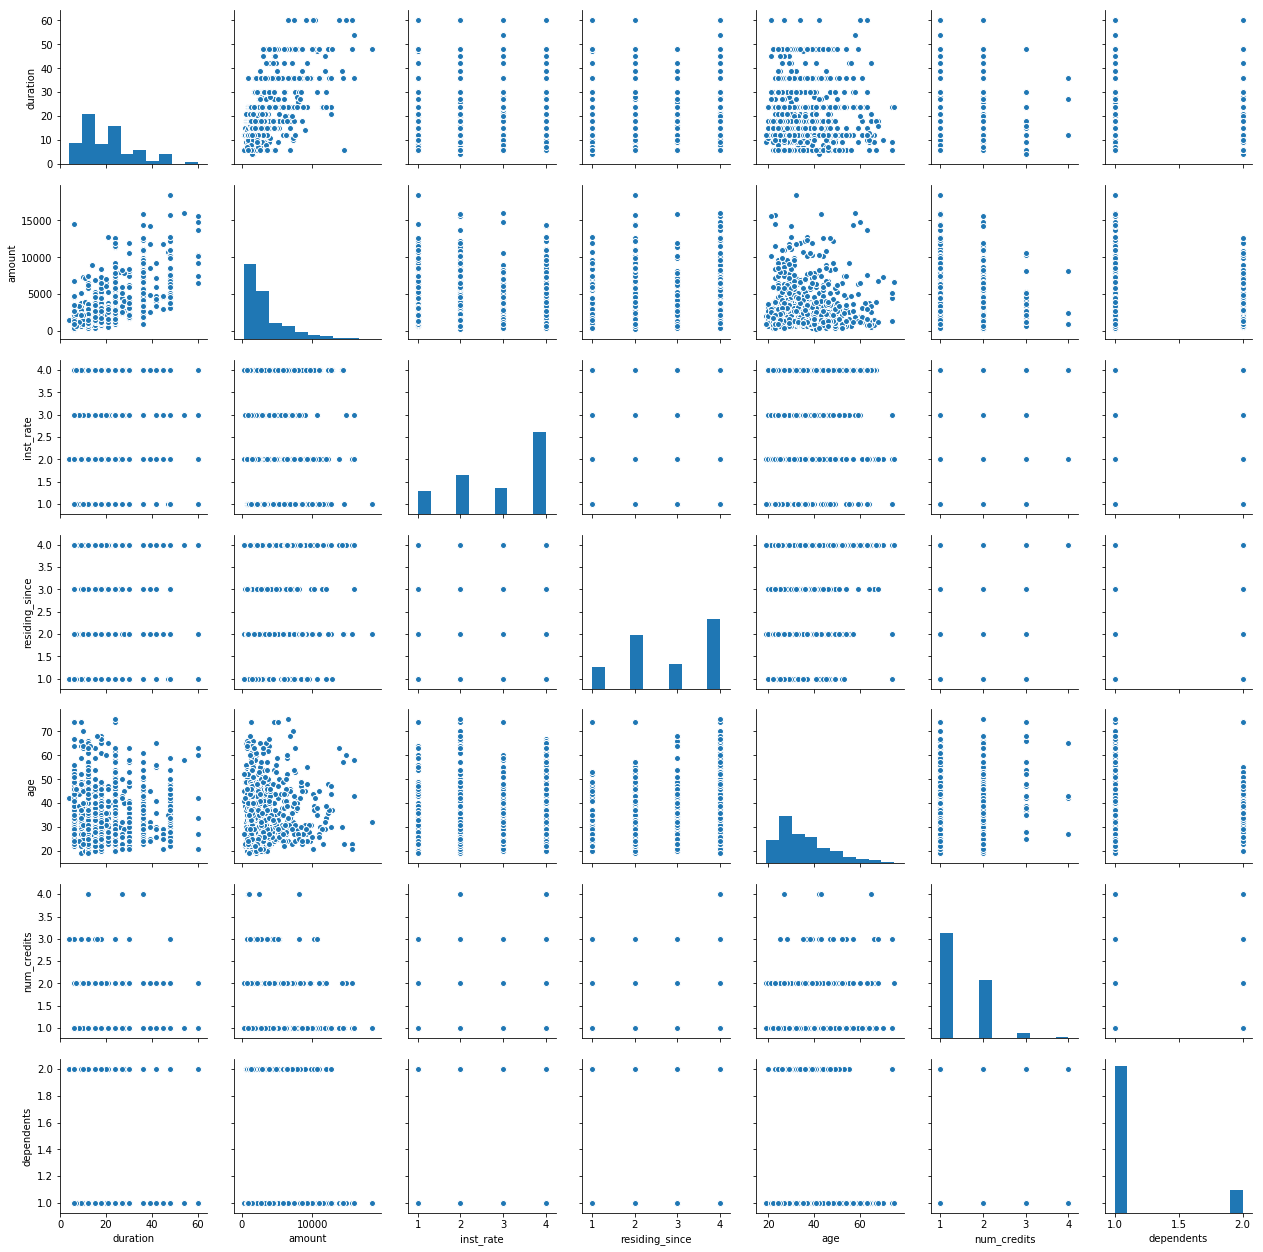

In [526]:
sns.pairplot(X_train)

## Correlating numerical features

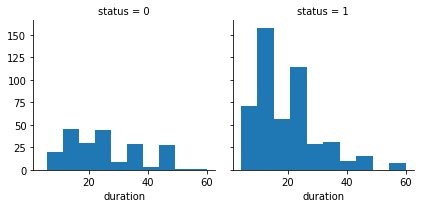

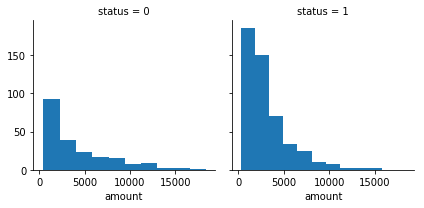

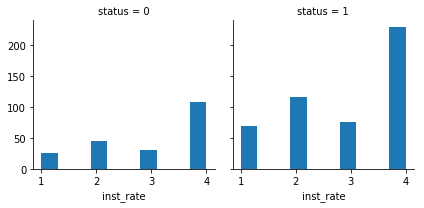

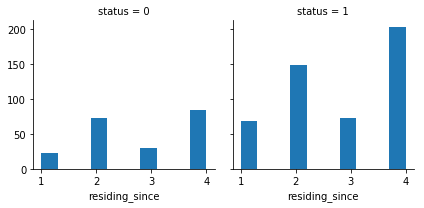

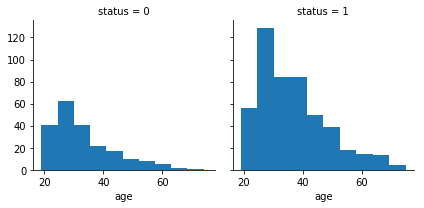

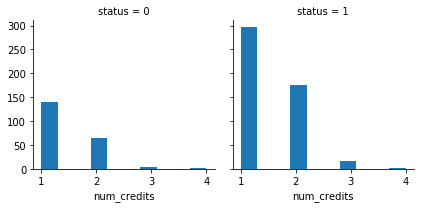

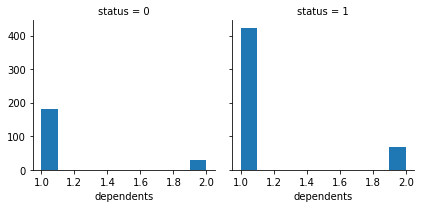

In [527]:
temp_df = pd.concat([X_train, y_train], axis=1)

for col in num_cols:
    
    g = sns.FacetGrid(temp_df,  col="status")
    g.map(plt.hist, col)

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/seaborn/axisgrid.py:703:

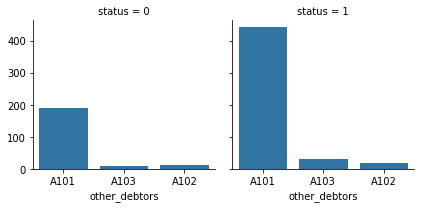

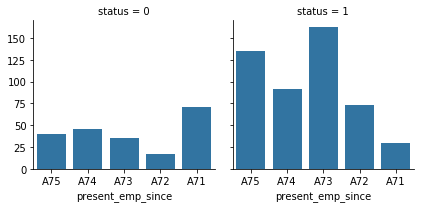

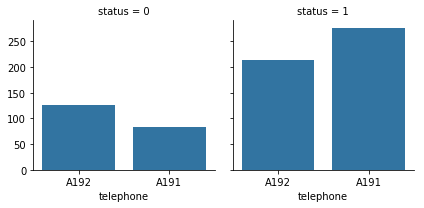

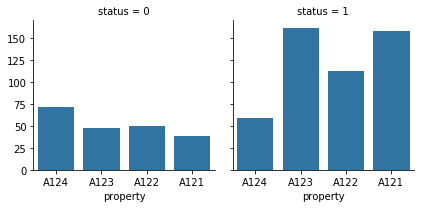

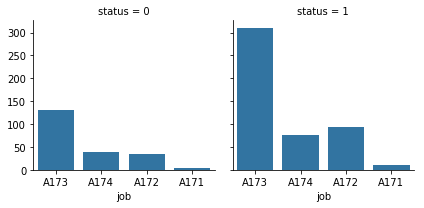

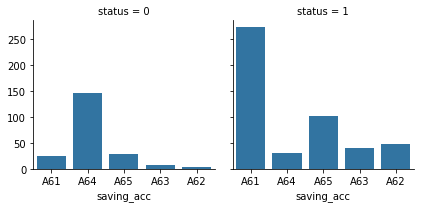

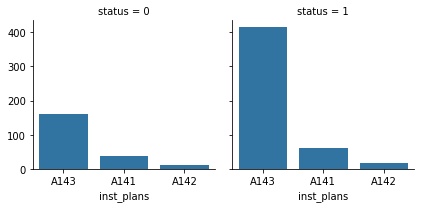

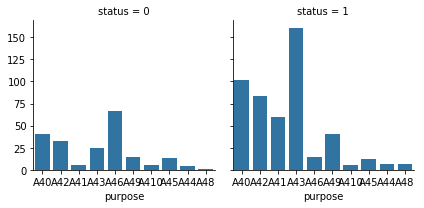

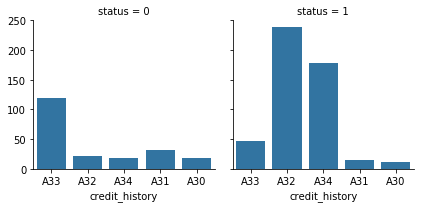

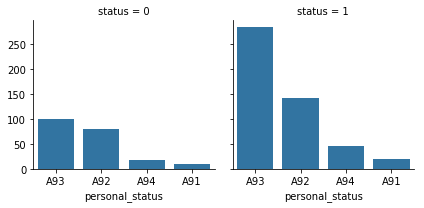

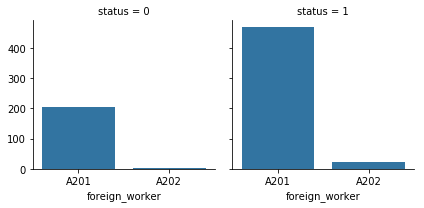

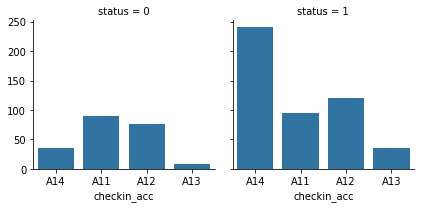

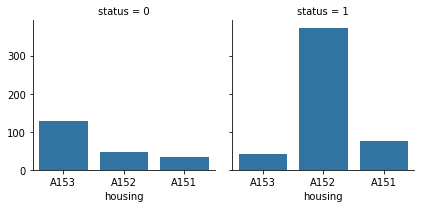

In [528]:
for col in cat_cols:
    
    g = sns.FacetGrid(temp_df,  col="status")
    g.map(sns.countplot, col)
    
plt.tight_layout()

## Feature-wise model accuracy

In [505]:
def dummify(train, test, cat_cols):
    train_dummy = pd.get_dummies(train, columns=cat_cols, drop_first=True, prefix=cat_cols)
    test_dummy = pd.get_dummies(test, columns=cat_cols, drop_first=True, prefix=cat_cols)
    # Add missing columns
    missing_cols = set(train_dummy.columns).difference(test_dummy.columns)
    for col in missing_cols:
        test_dummy[col] = 0
    return train_dummy, test_dummy

In [536]:
def model(X_train, y_train, X_val, y_val, cols, cols_attr):
    
    scores = []
    for col in cols:
        lr = LogisticRegression()
    
        if cols_attr == "categorical":
            X_train_new, X_val_new = dummify(X_train[col], X_val[col], col)
            lr.fit(X_train_new, y_train)
            y_predict = lr.predict(X_val_new)
            scores.append(col + ":" + str(accuracy_score(y_val, y_predict)))
        if cols_attr == "numerical":
            lr.fit(X_train[[col]], y_train)
            y_predict = lr.predict(X_val[[col]])
            scores.append(col + ":" + str(accuracy_score(y_val, y_predict)))
        
    return scores, all_preds

In [537]:
scores, all_preds = model(X_train, y_train, X_val, y_val, cat_cols, 'categorical')
scores

['other_debtors:0.6966666666666667',
 'present_emp_since:0.6966666666666667',
 'telephone:0.6966666666666667',
 'property:0.6966666666666667',
 'job:0.6966666666666667',
 'saving_acc:0.6966666666666667',
 'inst_plans:0.6966666666666667',
 'purpose:0.6966666666666667',
 'credit_history:0.71',
 'personal_status:0.6966666666666667',
 'foreign_worker:0.6966666666666667',
 'checkin_acc:0.6966666666666667',
 'housing:0.6966666666666667']

In [553]:
col = 'present_emp_since'
lr = LogisticRegression(C=1000000)
X_train_new, X_val_new = dummify(X_train[col], X_val[col], col)
lr.fit(X_train_new, y_train)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [554]:
y_predict = lr.predict(X_val_new)

In [555]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Heatmap

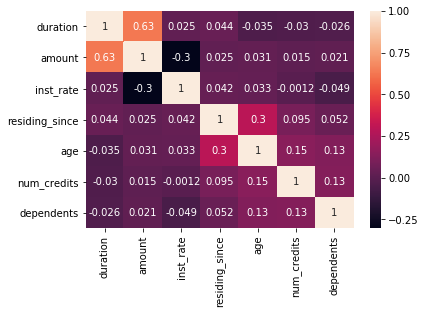

In [305]:
sns.heatmap(X_train[num_cols].corr(), annot=True)

## Feature Pre-processing

## 1) Outlier Treatment

## Approach 1 - Removing data points above 0.95 quantile

In [625]:
X_train.shape, y_train.shape

((700, 20), (700,))

In [626]:
def outlier_removal(X, y):
    
    qoutlier = X.quantile(0.95)
    for col in qoutlier.index:
        index = X[X[col] > qoutlier[col]].index
        X.drop(index, axis=0, inplace=True)
        y.drop(index, axis=0, inplace=True)

In [639]:
temp_X_df = X_train
temp_y_df = y_train
outlier_removal(temp_X_df, temp_y_df)

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [641]:
temp_X_df.shape, temp_y_df.shape

((610, 20), (610,))

## Approach 2 - Log transformation

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


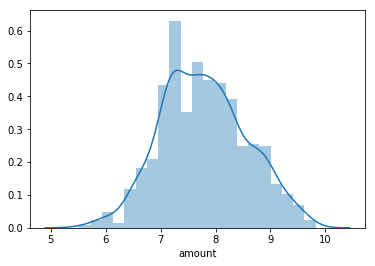

In [428]:
sns.distplot(np.log(df['amount']), kde=True)

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


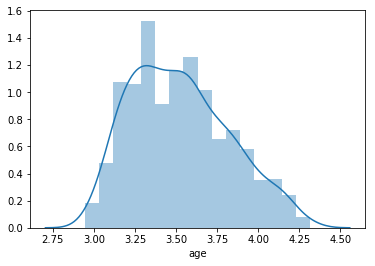

In [425]:
sns.distplot(np.log(df['age']), kde=True)

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


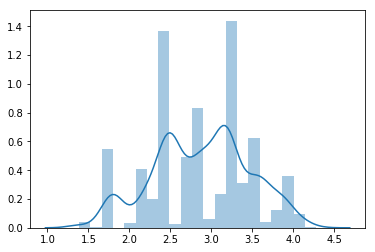

In [564]:
sns.distplot(np.log(df[['duration']]), kde=True)

## Normalisation

In [561]:
from sklearn.preprocessing import StandardScaler

In [562]:
scaler = StandardScaler()

In [659]:
def normalise(X, cols):
    
    for col in cols:
        
        X[col] = scaler.fit_transform(np.log(X_train[[col]]))
        
    
    return X
#         b = map(lambda x: x[0],a)
#         sns.distplot(pd.Series(b), kde=True)

In [660]:
X_train = normalise(X_train, ['duration', 'age', 'amount'])

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [661]:
X_train.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker
541,A14,0.486851,A33,A40,-0.258132,A61,A75,4,A93,A101,4,A124,1.926511,A143,A153,2,A173,1,A192,A201
440,A14,-0.733164,A32,A40,-0.354224,A61,A75,4,A93,A101,4,A123,0.471888,A143,A152,1,A174,1,A192,A201
482,A11,0.879607,A32,A42,0.476314,A64,A75,4,A92,A101,4,A122,1.753309,A143,A151,2,A173,1,A192,A201
422,A12,-0.733164,A34,A40,-1.213574,A61,A74,2,A93,A101,3,A121,1.101932,A143,A152,2,A172,2,A191,A201
778,A14,1.200513,A34,A41,1.054930,A64,A75,4,A93,A101,2,A123,0.384177,A143,A152,2,A174,1,A192,A201
